# Gausova Kvadratura a Legendrovy polynomy

In [ ]:
import numpy as np

leg = np.polynomial.legendre.Legendre([0, 0, 0, 0, 0, 1])
print(leg)
roots = leg.roots()
#for i in range(5):
#    if(roots[i] > -0.001 and roots[i] < 0.001):
#        roots[i] = 0
print(roots)


In [ ]:
import scipy.optimize as spo
P5 = lambda x: (63/8)*x**5 - (70/8)*x**3 + (15/8)*x
print(P5)
spo.fsolve(P5, [-0.9,-0.5,-2.88799790e-17,5.38e-01,9.0e-01])

In [ ]:
for x in roots:
    print(P5(x))

In [ ]:
import numpy as np

M = np.ones((5,5))
for i in range(5):
    for j in range(5):
        M[i,j] = roots[j]**i
print(M)

In [ ]:
import scipy.integrate as integ
b = np.ones(5)
for i in range(5):
    b[i]= integ.quad(lambda x: x**i,-1,1)[0]
print(b)

In [ ]:
A = np.linalg.solve(M, b)
print(A)

In [ ]:
f = lambda x: x**4 * (x-2) + 3*x**2 + 14
print(integ.quad(f, -1, 1))

K = lambda f: A[0]*f(roots[0]) + A[1]*f(roots[1]) + A[2]*f(roots[2]) + A[3]*f(roots[3]) + A[4]*f(roots[4])
print(K(f))


In [ ]:
import Kvadratury as kv
w = kv.getWeights([1, 1.5, 2.1, 3.4])
for a in w:
    print(a)

In [ ]:
for i in range(1,10):
    print(i)

---

In [1]:
import Kvadratury as kv
from matplotlib import pyplot as plt
import numpy as np


In [ ]:

n=15
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.generateLegendre(t, 100)
plt.plot(t, l[n])

In [ ]:
n=11
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.generateNormalLegendre(t, 50)
plt.plot(t, l[n])

In [ ]:
n=15
a = 0
b = 10
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.generateLegendreInterval(t, 50, a, b)
plt.plot(t, l[n])

In [ ]:
n=15
a = 0
b = 5
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.generateNormalLegendreInterval(t, 100, a, b)
plt.plot(t, l[n])

In [ ]:
n=100
f = lambda x: x**2
fI = lambda x: x**3/3
Gq = kv.JacobiGaussQuadLegendre(f,n)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(1)-fI(-1))
print("error:", Gq - (fI(1)-fI(-1)))

In [ ]:
n = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
Gq = kv.JacobiGaussQuadLegendreInterval(f, n, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(b)-fI(a))
print("error:", Gq - (fI(b)-fI(a)))

(100, 120)
(100, 120)


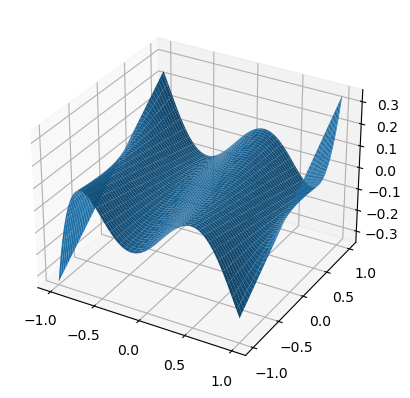

In [2]:
nx, ny = (120, 100)
a = -1
b = 1
c = -1
d = 1
xx = np.linspace(a, b, nx)
yy = np.linspace(c, d, ny)
X, Y = np.meshgrid(xx, yy)
l = kv.generate2DLegendre(X, Y, 500)
print(Y.shape)
print(X.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, l[5])
plt.show()
